# Import Libraries

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Multiple linear regression model
from sklearn import linear_model
# Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
# Principal component analysis
from sklearn.decomposition import PCA

# Import Data Sets

In [2]:
# Setting this option will print all collumns of a dataframe and all of the data in a feature
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# load train df
df_train = pd.read_csv('train.csv', index_col=0)
# Pick only rows where Target variable is not NaN
df_train = df_train[df_train['SalePrice'].notna()]
# load test df
df_test = pd.read_csv('train.csv', index_col=0)
df_test['SalePrice'] = "Unknown"
# Combine dfs
# df = pd.concat([df_train, df_test])
df = df_train.append(df_test, sort=False)

In [4]:
df.reset_index(inplace=True)
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2915,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,Unknown
2916,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,Unknown
2917,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,Unknown
2918,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,Unknown
2919,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,Unknown


# Data Wrangling and Exploratory Data Analysis

In [5]:
# Drop index
df.drop(['Id'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2920 non-null   int64  
 1   MSZoning       2920 non-null   object 
 2   LotFrontage    2402 non-null   float64
 3   LotArea        2920 non-null   int64  
 4   Street         2920 non-null   object 
 5   Alley          182 non-null    object 
 6   LotShape       2920 non-null   object 
 7   LandContour    2920 non-null   object 
 8   Utilities      2920 non-null   object 
 9   LotConfig      2920 non-null   object 
 10  LandSlope      2920 non-null   object 
 11  Neighborhood   2920 non-null   object 
 12  Condition1     2920 non-null   object 
 13  Condition2     2920 non-null   object 
 14  BldgType       2920 non-null   object 
 15  HouseStyle     2920 non-null   object 
 16  OverallQual    2920 non-null   int64  
 17  OverallCond    2920 non-null   int64  
 18  YearBuil

In [7]:
# Drop empty rows and columns that have more than 45% NaN
df.dropna(axis=1, how='any', thresh=len(df)*0.55, inplace=True)
df.dropna(axis=0, how='all', inplace=True)
# Drop empty rows where too many NaN
df.dropna(axis=0, thresh=len(df.columns)*0.3, inplace=True)

# Show remaining NaN
is_null_list = df.isnull().sum() / len(df)
is_null_list.sort_values(ascending=False)[:15]

LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
KitchenAbvGr    0.000000
dtype: float64

There is a lot of NaN, but generally it means absence or a feature

In [8]:
# Correct data types
df['MSSubClass'] = df['MSSubClass'].map(str)

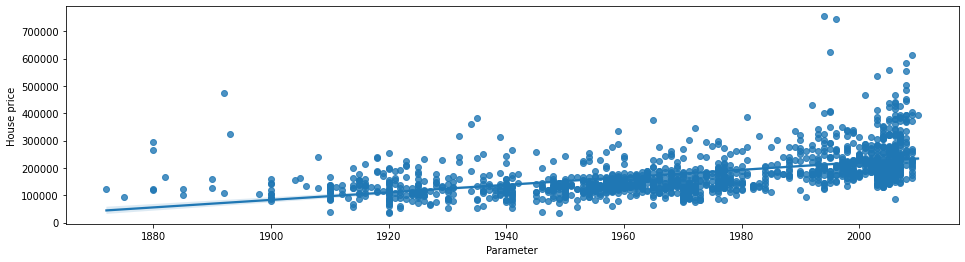

In [9]:
plt.figure(figsize=(16,4))
sns.regplot(x="YearBuilt", y="SalePrice", data=df_train).set(
    xlabel='Parameter', 
    ylabel='House price',
)
plt.show()

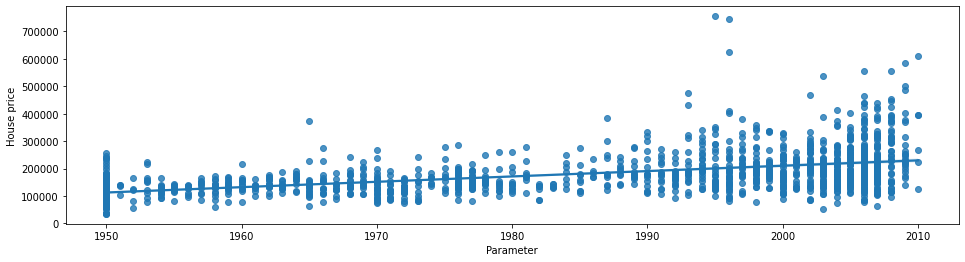

In [10]:
plt.figure(figsize=(16,4))
sns.regplot(x="YearRemodAdd", y="SalePrice", data=df_train).set(
    xlabel='Parameter', 
    ylabel='House price'
)
plt.show()

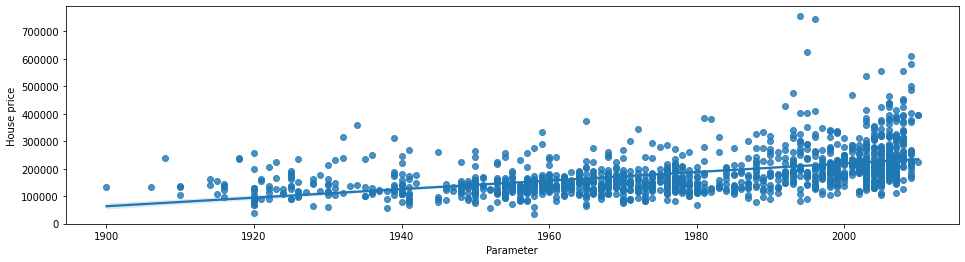

In [11]:
plt.figure(figsize=(16,4))
sns.regplot(x="GarageYrBlt", y="SalePrice", data=df_train).set(
    xlabel='Parameter', 
    ylabel='House price'
)
plt.show()

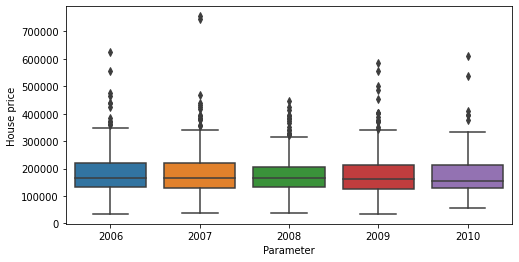

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(x="YrSold", y="SalePrice", data=df_train).set(
    xlabel='Parameter', 
    ylabel='House price'
)
plt.show()

In [13]:
# YsSold don't affect the price - Drop
df.drop('YrSold', axis=1, inplace=True)

In [14]:
# Convert years to categorical values
years_col_list=['YearBuilt','YearRemodAdd','GarageYrBlt']
bins=[1800,1945,1990,2020]
labels=['v_old','old','new']
for year_col in years_col_list:
    group = year_col + '_group'
    df[group] = str(pd.cut(df[year_col], bins=bins, labels=labels, right=False)[0])
    df.drop(year_col, axis=1, inplace=True)

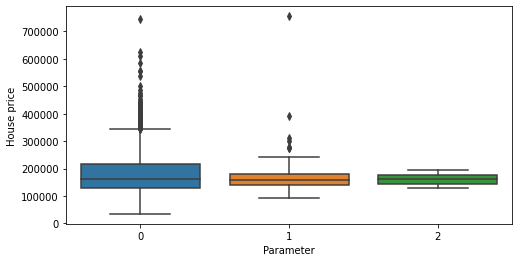

In [38]:
plt.figure(figsize=(8,4))
sns.boxplot(x="BsmtHalfBath", y="SalePrice", data=df_train).set(
    xlabel='Parameter', 
    ylabel='House price'
)
plt.show()

In [16]:
df.describe(include=np.number)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
count,2402.000000,2920.000000,2920.000000,2920.000000,2904.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918
std,24.279694,9979.555080,1.382760,1.112609,181.035018,456.019958,161.291638,441.791261,438.630172,386.521513,436.453656,48.614752,525.390365,0.518822,0.238712,0.550821,0.502799,0.815638,0.220300,1.625115,0.644556,0.747187,213.768215,125.317323,66.244678,61.108679,29.312308,55.747864,40.170424,496.038036,2.703163
min,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000


In [17]:
df.describe(include=np.object0)

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice,YearBuilt_group,YearRemodAdd_group,GarageYrBlt_group
count,2920,2920,2920,2920,2920,2920,2920,2920,2920,2920,2920,2920,2920,2920,2920,2920,2920,2904,2920,2920,2920,2846,2846,2844,2846,2844,2920,2920,2920,2918,2920,2920,2758,2758,2758,2758,2920,2920,2920,2920,2920,2920,2920
unique,15,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,6,3,5,5,3,9,6,664,1,1,1
top,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,Unknown,new,new,new
freq,1072,2302,2908,1850,2622,2918,2104,2764,450,2520,2890,2440,1452,2282,2868,1030,1008,1728,1812,2564,1294,1298,2622,1906,860,2512,2856,1482,2730,2668,1470,2720,1740,1210,2622,2652,2680,2534,2396,1460,2920,2920,2920


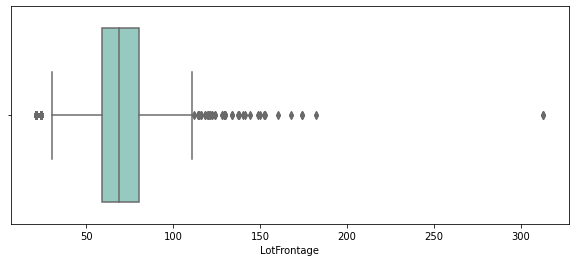

In [18]:
# Plot boxplot for LotFrontage
plt.figure(figsize=(10,4))
ax = sns.boxplot(x=df['LotFrontage'], palette="Set3")
plt.show()

In [19]:
# Because LotFrontage have a lot of NaN we use the Linear Regression to determine its values
feature_id = 'LotFrontage'
correlation = df.corr()[feature_id].copy()

correlation = pd.DataFrame(correlation)
correlation.drop(labels=[feature_id], axis=0, inplace=True)
correlation.reset_index(inplace=True)

cor_columns = []
for index, row in correlation.iterrows():
    if  type(row[feature_id]) == int or float:
        if  (row[feature_id]>=0.2) | (row[feature_id]<=-0.2):
            cor_columns.append(row["index"])

In [20]:
# Apply mean() to columns that have numbers
columns_with_numbers = list(df.describe(include=np.number).columns)
columns_with_numbers.remove(feature_id)
df[columns_with_numbers] = df[columns_with_numbers].apply(lambda x: x.fillna(x.mean()),axis=0)

# Devide the data where Y is NaN or not
X_train = []
X_test = []
Y_train = []

for index, row in df.iterrows():
    if  pd.isna(row[feature_id]):
        X_test.append(row[cor_columns])
    else:
        X_train.append(row[cor_columns])
        Y_train.append(row[feature_id])

In [21]:
# Standardize the data
transform = preprocessing.StandardScaler()

X_train = transform.fit_transform(X_train)
X_test = transform.fit_transform(X_test)
Y_train = np.array(Y_train)

# Use RandomForestRegressor to fill the predicted feature
rfc = RandomForestRegressor(random_state=38)
predicted_feature = rfc.fit(X_train, Y_train).predict(X_test)

# Change all NaN in LotFrontage to predicted values
i = 0
for index, row in df.iterrows():
    if  pd.isna(row[feature_id]):
        df.loc[index, feature_id] = predicted_feature[i]
        i += 1

# Replace the objects (strings) np.nan values with Unknown
df.replace(np.nan, "Unknown", inplace=True)

In [22]:
# Check NaN
df.isnull().sum().sum()

0

In [46]:
# Because LotFrontage have a lot of NaN we use the Linear Regression to determine its values
feature_id = 'SalePrice'
correlation = df_train.corr()[feature_id].copy()
correlation = pd.DataFrame(correlation)
correlation.drop(labels=[feature_id], axis=0, inplace=True)
correlation.reset_index(inplace=True)

cor_columns = []
for index, row in correlation.iterrows():
    if  type(row[feature_id]) == int or float:
        if  (row[feature_id]>=0.1) | (row[feature_id]<=-0.1):
            cor_columns.append(row["index"])

In [57]:
for year_col in years_col_list:
    cor_columns.remove(year_col)

ValueError: list.remove(x): x not in list

# Model Development

In [67]:
# Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame
columns_with_numbers = list(df.describe(include=np.number).columns)
columns_with_strings = list(df.describe(include=np.object_).columns)
columns_with_strings.remove('SalePrice')
# Aplly one-hot encoding
# Feature = pd.concat([pd.get_dummies(df[columns_with_strings]), df[columns_with_numbers]], axis=1)
Feature = pd.concat([pd.get_dummies(df[columns_with_strings]), df[cor_columns]], axis=1)

In [68]:
# Standardize the data in X then reassign it to the variable X using the transform
transform = preprocessing.StandardScaler()
X = Feature.iloc[:len(df_train),:]
y = df['SalePrice'].iloc[:len(df_train)]

In [69]:
# Standardize the data in X then reassign it to the variable X using the transform
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
# # Sclit the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

In [70]:
# RandomForestRegressor Score with defaults parameters
rfc = RandomForestRegressor(random_state=38)
rfc.fit(X_train, y_train).score(X_test, y_test)

0.8065256476577287

In [71]:
# GradientBoostingRegressor Score with defaults parameters
reg = GradientBoostingRegressor(random_state=38)
reg.fit(X_train, y_train).score(X_test, y_test)

0.8275341931433823

In [72]:
# Visualization of the features importance
feats = {}
for feature, importance in zip(df.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
importances

,Features,Gini-Importance
0,GarageCars,3.965473e-03
1,Foundation,1.339240e-03
2,LandSlope,1.272331e-03
3,Exterior1st,8.410870e-04
4,LotShape,8.204552e-04
...,...,...
69,YearRemodAdd_group,4.406155e-07
70,GrLivArea,3.880170e-07
71,LotFrontage,1.053549e-07
72,BsmtFinSF1,0.000000e+00


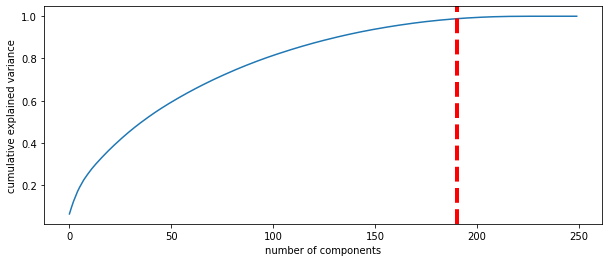

In [73]:
# Use Principal component analysis
# Set n_components to 281 to see the variance of all generated features.
pca_test = PCA(n_components=250)
pca_test.fit(X_train)

plt.figure(figsize=(10,4))
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=190, ymin=0, ymax=1)
plt.show()

In [74]:
pca = PCA(n_components=150)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [75]:
rfc.fit(X_train_pca, y_train).score(X_test_pca, y_test)

0.7724568911110975

In [76]:
reg.fit(X_train_pca, y_train).score(X_test_pca, y_test)

0.8161234332287238

# Final Estimation and Prediction

In [33]:
# Define X 
X_traine_final = transform.fit_transform(X)
X_test_final = transform.fit_transform(Feature.iloc[len(df_train)+1:,:])

In [34]:
# Use PCA
# pca = PCA(n_components=190)
pca_test.fit(X_traine_final)
X_traine_final_pca = pca.transform(X_traine_final)
X_test_final_pca = pca.transform(X_test_final)
# Generate Gradient Boosting object
reg_opt = GradientBoostingRegressor(random_state=38)

reg.fit(X_traine_final_pca, y)
# Define parameters for cross validation
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]
learning_rate = [0.005, 0.01, 0.1, 0.15, 0.2, 0.25, 0.3]
hyperparameters = {'n_estimators': n_estimators, 'learning_rate':learning_rate}
# Calculate score
reg_cv = RandomizedSearchCV(reg_opt,
                        hyperparameters,
                        cv = 10,
                        n_jobs=-1,
                        random_state=38)
reg_cv.fit(X_traine_final_pca, y)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=38),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.005, 0.01, 0.1,
                                                          0.15, 0.2, 0.25,
                                                          0.3],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200]},
                   random_state=38)

In [35]:
# Prdict SalePrice
df.loc[len(df_train)+1:, 'SalePrice'] = reg_cv.best_estimator_.predict(X_test_final_pca)

In [36]:
# Save results
prediction = pd.DataFrame(df.loc[len(df_train)+1:, 'SalePrice'])
prediction.reset_index(inplace=True)
prediction.rename(columns={'index':'Id'},inplace=True)
pd.DataFrame(prediction).to_csv('prediction.csv', index=False)
prediction.head()

,Id,SalePrice
0,1461,179938.353035
1,1462,219170.252549
2,1463,157547.851693
3,1464,281341.132934
4,1465,151352.349329
